<a href="https://colab.research.google.com/github/Shivu1414/OIBSIP_DataScience/blob/main/Task5_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Advertising.csv')

In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

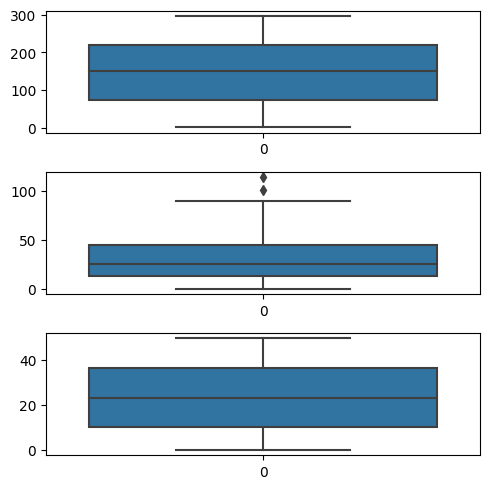

In [10]:
fig, axs=plt.subplots(3, figsize=(5,5))
plt1=sns.boxplot(data['TV'],ax=axs[0])
plt2=sns.boxplot(data['Newspaper'],ax=axs[1])
plt3=sns.boxplot(data['Radio'],ax=axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

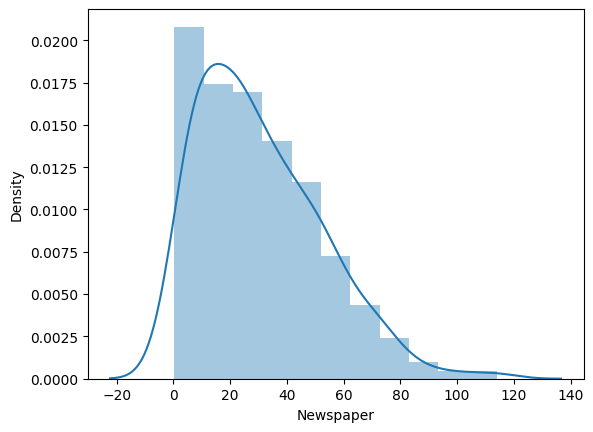

In [58]:
 sns.distplot(data['Newspaper'])

In [59]:
iqr=data.Newspaper.quantile(0.75)-data.Newspaper.quantile(0.25)

In [13]:
lower_bridge=data['Newspaper'].quantile(0.25)-(iqr*1.5)
upper_bridge=data['Newspaper'].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [14]:
df=data.copy()

In [15]:
df.loc[df['Newspaper']>=93,'Newspaper']=93

<Axes: >

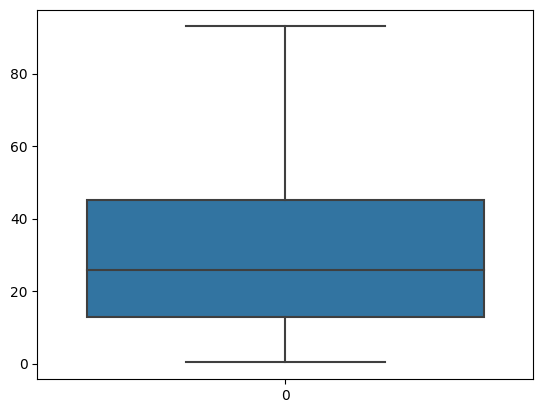

In [16]:
sns.boxplot(df['Newspaper'])

<Axes: >

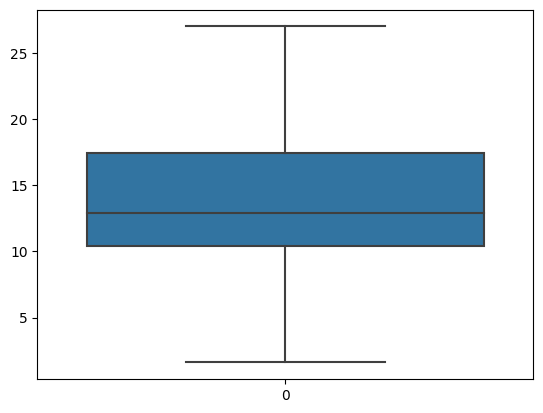

In [17]:
sns.boxplot(df['Sales'])

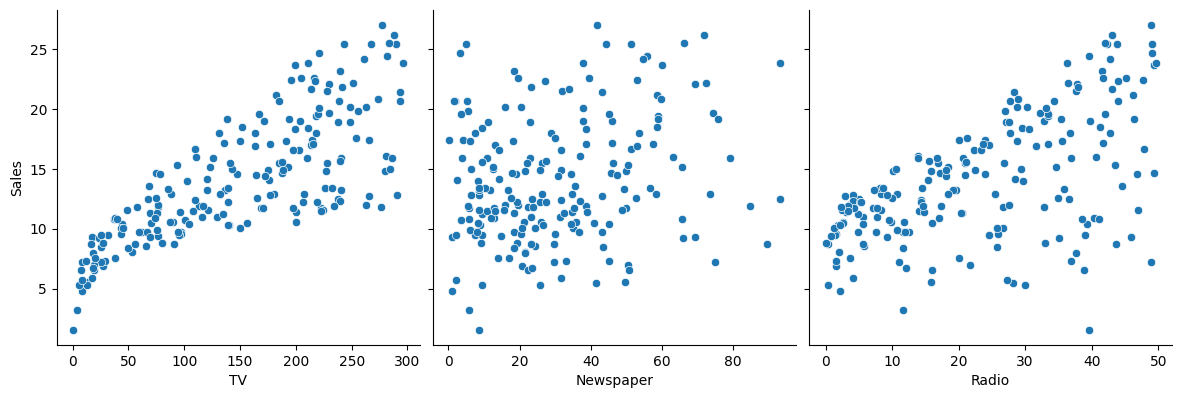

In [18]:
sns.pairplot(df, x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4, aspect=1, kind='scatter')
plt.show()

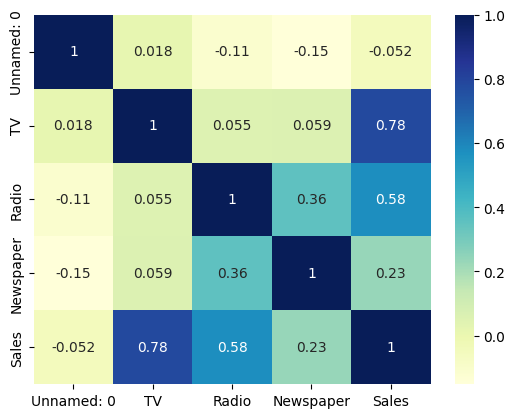

In [19]:
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True)
plt.show()

In [20]:
important_feature=list(data.corr()['Sales'][(data.corr()['Sales']>+0.5)|(data.corr()['Sales']<-0.5)].index)

In [21]:
print(important_feature)

['TV', 'Radio', 'Sales']


In [22]:
x=df['TV']
y=df['Sales']

In [23]:
x=x.values.reshape(-1,1)

In [24]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [25]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [26]:
print(x.shape,y.shape)

(200, 1) (200,)


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.33)

In [28]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [29]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
knn=KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [31]:
knn_train_pred=knn.predict(x_train)

In [32]:
knn_test_pred=knn.predict(x_test)

In [33]:
print(knn_train_pred,knn_test_pred)

[11.24 11.88 18.68 13.34 19.84 13.68 17.2   7.78 13.34 10.58  6.24 19.84
 16.28 11.88  7.78  6.24 14.32 11.26 18.86 21.78 13.02 16.28 18.68  5.82
  7.78 10.28 19.42 10.28 15.28 13.72 16.34 12.06  9.68 20.8   9.8   8.22
 14.2  13.72 16.4  21.44 16.98 18.86 21.22 16.4  20.2  18.42  9.94  7.78
 13.42 21.46  9.94 12.04 14.32 10.2   9.94 20.82 19.42 14.22 15.24 14.2
 14.8   9.32 20.66 16.98 16.98 15.1  20.38 10.2   4.68  6.24  9.38 20.54
  9.64 10.58 13.5  10.2  19.84 13.3  15.8  13.44 14.08 14.74 16.64 12.06
 10.46 14.32 12.8  16.04 15.96  9.64 16.28 21.44 21.22 13.72  4.68 10.28
 10.28 16.2   8.22 10.58  9.92 19.72 13.72 19.84 21.44 21.46 10.28 12.66
 16.44 15.68 15.96 16.28  9.64 19.84 18.42 16.98 12.06  9.38  7.92 17.18
 12.78 19.72 18.42  7.78 16.98 19.94 19.94 12.06 15.36 11.56  7.3  14.8
 20.54 12.8 ] [14.32  8.22 20.66 21.78 12.78 15.96 21.44 14.2  21.22 17.1  13.72 13.68
 16.2  19.84 15.04 16.44 14.4  21.46 13.3  15.14 20.8  13.44 10.58  5.82
  9.32 14.04 12.06  9.38  8.22 14.08  7

In [34]:
Result=pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Varience"])

In [35]:
r2=r2_score(y_test,knn_test_pred)
r2_train=r2_score(y_train,knn_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,knn_test_pred))
varience=r2_train-r2
Result=Result.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Varience":varience},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.45758139558341815
RMSE: 3.718363928266073


In [36]:
Result.head()

,Model,Train R2,Test R2,Test RMSE,Varience
0,K-Nearest Neighbors,0.734335,0.457581,3.718364,0.276753


In [37]:
svr=SVR().fit(x_train,y_train)
svr

SVR()

In [38]:
svr_train_pred=svr.predict(x_train)
svr_test_pred=svr.predict(x_test)

In [39]:
print(svr_train_pred,svr_test_pred)

[11.66413541 10.58998936 17.87050548 13.06385632 20.09974055 13.4016839
 18.77149807  8.60526071 13.02532067 11.24510166  8.52527684 20.10574979
 15.76176223 10.6431279   8.63502213  8.49636718 14.44435164 11.75374128
 16.1277966  20.34510943 12.66570248 15.58635584 17.83759524  8.49088786
  8.59999524 10.35971511 17.41362814 10.3225505  17.16123901 15.05115235
 15.96503901 10.6757579   9.77097002 17.74522465 11.42201384  8.77802157
 13.24185367 11.93699834 16.98247168 20.22469167 18.36919789 16.23537456
 19.55133512 16.97586597 17.49999485 19.08607727  9.17617573  8.60526071
 12.06612465 20.39270201  9.18322431 10.78546171 14.38219609 11.50026946
  9.22955926 20.34064896 17.42027312 14.74706741 18.11234169 13.23746262
 16.51765794  8.9603277  19.84237503 18.46390992 18.31829579 13.79848636
 17.69893388 11.4807228   8.47643228  8.49710997  9.88105045 20.39405335
  9.35839508 11.14618584 12.1525734  11.55104482 20.05607054 12.03085176
 15.34377407 13.10689456 12.91501176 13.60192716 15.

In [40]:
r2=r2_score(y_test,svr_test_pred)
r2_train=r2_score(y_train,svr_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,svr_test_pred))
varience=r2_train-r2
Result=Result.append({"Model":"Support vector machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Varience":varience},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.4611334095427071
RMSE: 3.706169126966126


In [41]:
Result.head()

,Model,Train R2,Test R2,Test RMSE,Varience
0,K-Nearest Neighbors,0.734335,0.457581,3.718364,0.276753
1,Support vector machine,0.644742,0.461133,3.706169,0.183609


In [42]:
import statsmodels.api as sm

In [43]:
x_train_constant=sm.add_constant(x_train)

In [44]:
model=sm.OLS(y_train,x_train_constant).fit()

In [45]:
model.params

const    6.772173
x1       0.050466
dtype: float64

In [46]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     262.7
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           3.40e-33
Time:                        05:20:38   Log-Likelihood:                -339.39
No. Observations:                 134   AIC:                             682.8
Df Residuals:                     132   BIC:                             688.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7722      0.531     12.756      0.0

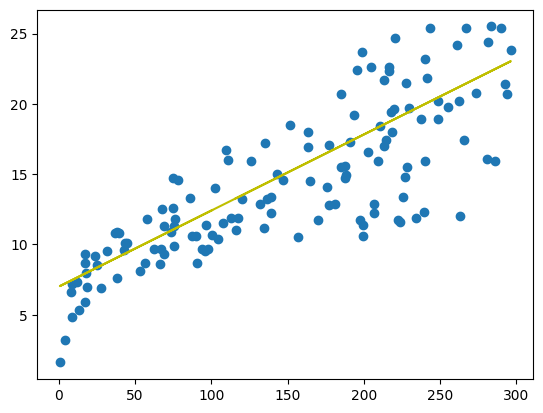

In [47]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955+0.0541*x_train,'y')
plt.show()

In [48]:
y_train_pred=model.predict(x_train_constant)
res=(y_train-y_train_pred)
res

51    -1.138979
140    0.423608
128    6.810124
99     3.604797
54     0.170358
         ...   
161    2.202874
108   -2.133281
9     -6.255319
17     3.426640
79    -1.626252
Name: Sales, Length: 134, dtype: float64

In [49]:
y_train_pred

array([11.83897922, 10.476392  , 17.8898758 , 13.59520275, 20.0296424 ,
       13.98379244, 18.60649574,  7.64019194, 13.54978317, 11.29899095,
        7.36262787, 20.03973564, 16.24972452, 10.54199805,  7.72093784,
        7.20618267, 15.07386221, 11.95505146, 16.54747506, 21.39222962,
       13.11577391, 16.10337256, 17.8646427 ,  7.16580972,  7.62505208,
       10.19378132, 17.54165907, 10.14836174, 17.34988753, 15.63908358,
       16.41626295, 10.58237101,  9.47211475, 17.79399003, 11.52608882,
        8.03887486, 13.80211414, 12.19224257, 17.21362881, 21.73035311,
       18.27846549, 16.63326759, 19.32816231, 17.20858219, 17.60726512,
       18.87901319,  8.68988876,  7.64019194, 12.35878101, 21.08438584,
        8.69998199, 10.71862973, 15.01330278, 11.62702121,  8.76558805,
       20.58477052, 17.54670568, 15.36151951, 18.07660071, 13.79706752,
       16.85531884,  8.3618585 , 19.66123919, 18.35416478, 18.23809253,
       14.4178017 , 17.7586637 , 11.60178811,  6.9790848 ,  7.21

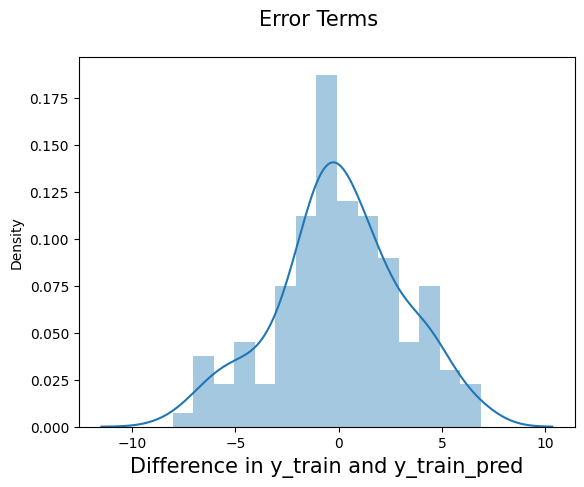

In [50]:
fig=plt.figure()
sns.distplot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('Difference in y_train and y_train_pred',fontsize=15)
plt.show()

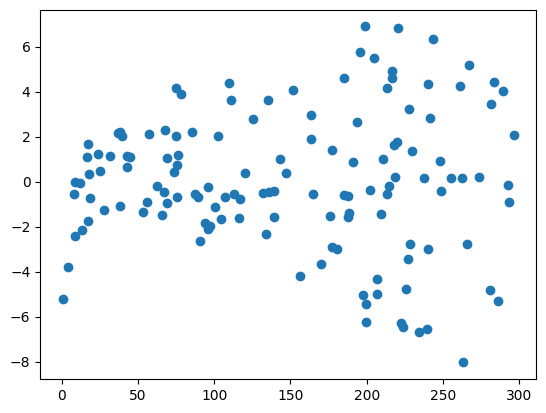

In [51]:
plt.scatter(x_train,res)
plt.show()

In [52]:
x_test_constant=sm.add_constant(x_test)
y_pred=model.predict(x_test_constant)

In [53]:
y_pred

array([15.12937502,  8.12466739, 19.58049328, 21.28625061, 12.8785828 ,
       16.74429321, 21.44269581, 13.81220738, 19.43414132, 16.52224196,
       15.60880386, 13.90304653, 17.99585481, 20.15580788, 15.18993446,
       18.75284771, 14.32696255, 21.11971217, 12.31336144, 17.07232347,
       17.79903665, 13.73146147, 11.22833828,  7.14057662,  9.29548308,
       15.41703233, 10.62779058,  9.77995853,  8.06410796, 13.30249883,
        7.7613108 ,  9.20969055, 18.38444449, 20.7361691 ,  8.21550654,
       11.6774874 , 18.84873347, 15.27068037, 15.98730031, 15.47759176,
       13.38829135, 10.22406103, 16.8199925 , 10.62274396, 17.41044696,
        7.19608943, 14.33200917, 17.64259145,  7.71589123, 18.48537688,
       20.74626234, 18.79322066,  9.01791901, 12.85334971, 20.91280078,
        7.04469085, 10.81956211, 18.88910643,  7.75121756,  8.03382824,
       13.85258033, 12.98456181, 11.51094896, 17.89996904, 10.33508666,
        7.43832716])

In [54]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [55]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.6465098896272106

In [56]:
r2=r2_score(y_test,y_pred)

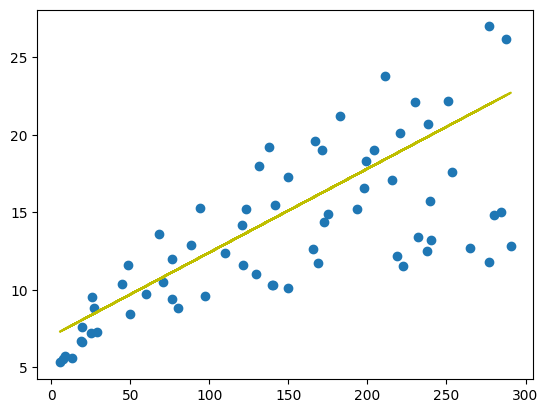

In [57]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955+0.0541*x_test,'y')
plt.show()